
Getting data - Setup Data - Training and Test

In [94]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# y = pd.DataFrame(np.where(y[:]==0, 1, 0))
for i in y:
    if i==1:
        i=0
    else:
        i=1
        


X.head()        # to get a feeling of data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [95]:
y.shape       #Data targets

(569,)

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

adding a column of 1 to training and test data

In [97]:
X_train.insert(0, "Dummy", np.ones(X_train.shape[0]))
X_test.insert(0, "Dummy", np.ones(X_test.shape[0]))


features_size = X_train.shape[1]  # Extracting the number of features




In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy(y_train)
y_test = y_test.to_numpy(y_test)


Sigmoid Function

In [99]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

Training using Logistic Regression

In [100]:


w = np.zeros(features_size)
learning_rate = 0.01
N = X_train.shape[0]
delta_E = 20*np.ones(features_size)
threshold = 20
theta = 0.5
num_of_iterations = 5
counter = 0
while counter <= num_of_iterations:
    
    predicted_class = []
    delta_E = 0
    for i in range(N):
        delta_E += -1/N * (y_train[i]*X_train[i][:].T) / (1+np.exp(y_train[i]*w.T@X_train[i][:].T))
        
    w = w - learning_rate * delta_E

    Error_zero_one = 0
    for i in range(N):
        predicted_class.append(1 if sigmoid(w.T@X_train[i][:].T) >= theta else 0)
        if y_train[i] != predicted_class[i]:
            Error_zero_one += 1
    counter += 1

Generalization_Err = 0
for i in range(N):
    if y_train[i] != predicted_class[i]:
        Generalization_Err += 1

print(Generalization_Err/y_train.shape[0]*100)
    




8.398950131233596


In [103]:
def confusion_matrix(predict, y_test):
    TP, FP, TN, FN = 0, 0, 0, 0
    for y,t in zip(predict,y_test):
        if y == 1 and t == 1:
            TP += 1
        if y == 1 and t == 0:
            FP += 1
        if y == 0 and t == 0:
            TN += 1
        if y == 0 and t == 1:
            FN += 1
        
        FPR = 0 if (FP + TN) == 0 else FP / (FP + TN)     # Fase positive rate
        TPR = 0 if (TP + FN) == 0 else TP / (TP + FN)       # True Positive Rate
        specificity = 0 if (TN + FP) == 0 else TN / (TN + FP)
        miss_classification = (FP+FN)/(TP+TN+FP+FN)
        recall = 0 if (TP+FN) == 0 else TP/(TP+FN)
        precision = 0 if (TP+FP) == 0 else TP/(TP+FP)
        F1 = 2*(recall*precision)/(recall+precision)
    return miss_classification, TPR, FPR, F1, specificity, TP, TN, FP, FN


ROC

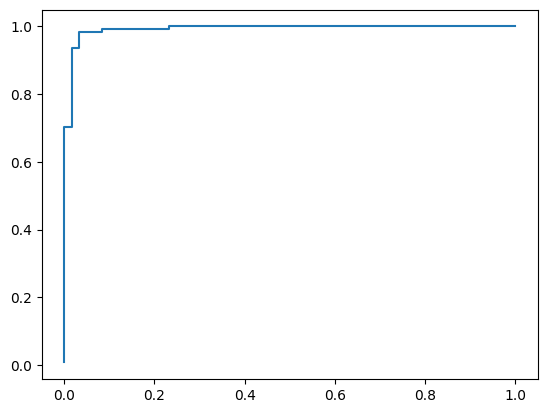

In [117]:
theta = np.linspace(0,1,150)

miss_classification_rate_all_coded = []

theta = X_test@w
theta = sigmoid(theta)
theta = np.sort(theta)
TPR_coded = []
specifity_coded = []
FPR_coded = []
N = X_test.shape[0]

for theta_i in theta:
    predicted_class = []
    for i in range(N):
        
        predicted_class.append(1 if sigmoid(w@X_test[i][:]) >= theta_i else 0)
        
    miss_classification_rate, TPR, FPR, specificity, TP, TN, FP, FN = confusion_matrix(predicted_class, y_test)
    
    miss_classification_rate_all_coded.append(miss_classification_rate)
    specifity_coded.append(specificity)
    TPR_coded.append(TPR)
    FPR_coded.append(FPR)


plt.plot(FPR_coded, TPR_coded)



Logistic Regression with Sci-kit

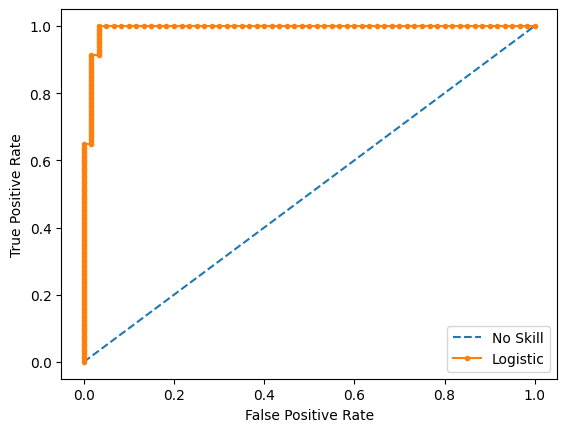

(189,)


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve


clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
yhat = clf.predict_proba(X_test)
yhat = yhat[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, yhat,drop_intermediate=False)

w_lf = clf.coef_
w.shape


TPR_SCI = []
specifity_SCI = []
FPR_SCI = []
miss_classification_rate_all_SCI = []

# theta = np.linspace(-20,40,1000)
# theta_l = 1/(1+np.exp(-theta))
for THRESHOLD in theta:

    preds = np.where(yhat > THRESHOLD, 1, 0)
    
    miss_classification_rate, TPR, FPR, specificity, TP, TN, FP, FN = confusion_matrix(preds, y_test)
    
    miss_classification_rate_all_SCI.append(miss_classification_rate)
    specifity_SCI.append(specificity)
    TPR_SCI.append(TPR)
    FPR_SCI.append(FPR)



# plt.plot(FPR_SCI, TPR_SCI)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

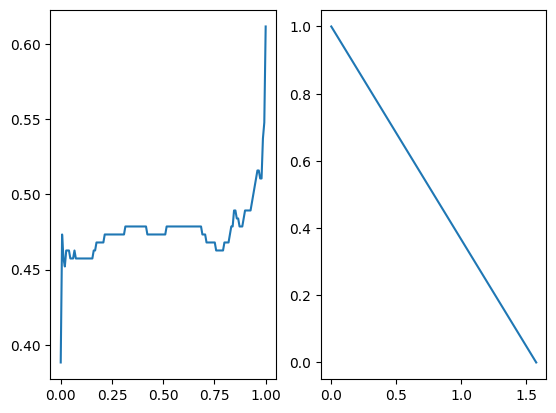

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(theta.T, miss_classification_rate)
ax[1].plot(Spec_arr, Sens_arr)
plt.show()

In [ ]:
clf.predict_proba(X_train)

array([[9.94983718e-01, 5.01628187e-03],
       [3.53708802e-06, 9.99996463e-01],
       [8.83133622e-05, 9.99911687e-01],
       [1.79352379e-04, 9.99820648e-01],
       [9.95947342e-01, 4.05265818e-03],
       [9.99999986e-01, 1.36762588e-08],
       [7.76113147e-02, 9.22388685e-01],
       [9.99999948e-01, 5.16145251e-08],
       [2.43775743e-06, 9.99997562e-01],
       [9.88871822e-01, 1.11281778e-02],
       [9.99416865e-01, 5.83134619e-04],
       [1.62464303e-05, 9.99983754e-01],
       [1.00000000e+00, 1.76947414e-10],
       [9.99999060e-01, 9.40127420e-07],
       [4.03390717e-08, 9.99999960e-01],
       [2.01021103e-04, 9.99798979e-01],
       [3.83277103e-02, 9.61672290e-01],
       [9.31833475e-01, 6.81665250e-02],
       [6.23478536e-06, 9.99993765e-01],
       [9.99370073e-01, 6.29926942e-04],
       [9.99999931e-01, 6.90195389e-08],
       [9.16133469e-01, 8.38665307e-02],
       [9.99999991e-01, 8.68761795e-09],
       [3.85882883e-05, 9.99961412e-01],
       [5.578001